In [45]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as optimize
import scipy.stats as stats

#sets the titles and axes labels for the two plots
xtitle="x (units)"
ytitle="y (units)"

#source data
#this is the precision of the measurements of your source data
Yprecis=0.5
Ydata=(1,2,3,4,5,6,7,8,9,10)
#most of the time, the raw data has constant errors (as the error is usually the precision of the measurement)
Ydata_err=np.ones(len(Ydata))*Yprecis
Xdata=(1,2,3,4,5,6,7,8,9,10)
#does the necessary calculations on the source data


#assigns the final values to x and y
x=np.array(Xdata)
y=np.array(Ydata)
y_err=np.array(Ydata_err)

#generates fake data for prep work. please remove this section during the lab session
y=y+np.random.normal(0,y_err, len(y))

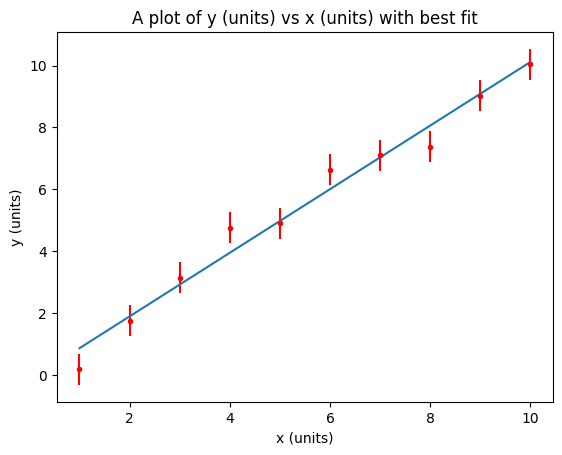

In [46]:
#defines a straight line for the fitting and residuals
#this can be replaced by any fit equation
def straight_line(x, m, c):
    y = m * x + c
    return y

#performs a least squares fit
dof = len(x) - 2
m_InitialGuess=1
c_InitialGuess=1

popt, pcov = optimize.curve_fit(straight_line, x, y,
                                p0=[m_InitialGuess, c_InitialGuess], sigma=y_err)

m = popt[0]
c = popt[1]
errors = np.sqrt(np.diag(pcov))
m_err = errors[0]
c_err = errors[1]
y_fit = straight_line(x, m, c)

#plots the fitted straight line and the original points, with their errors
plt.errorbar(x, y, yerr=y_err, fmt='r.')
plt.plot(x, y_fit, marker=None)
plt.ylabel(ytitle)
plt.xlabel(xtitle)
plt.title("A plot of " + str(ytitle) + " vs " + str(xtitle) + " with best fit")
plt.show()

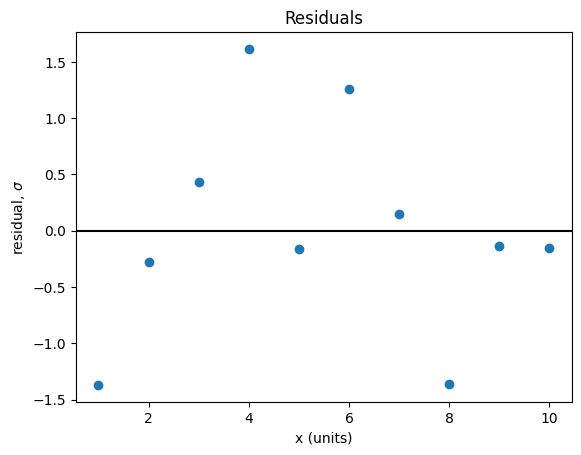

In [47]:
residuals = y - y_fit
chi_square = np.sum(residuals**2/y_err**2)
plt.scatter(x, residuals/y_err)
plt.axhline(y=0, color='black')
plt.ylabel('residual, $\sigma$')
plt.xlabel(xtitle)
plt.title('Residuals')
plt.show()

In [48]:
print('The obtained value for the gradient m is:\n')
print(f'{m:.3} +/- {m_err:.2} units')
print('\nThe obtained value for the y-intercept c is:\n')
print(f'{c:.3} +/- {c_err:.2} units')
print(f'The fit yielded \nchi2 = {chi_square:.3} with {dof} degrees of freedom')
print(f'giving a reduced chi2 of {chi_square/dof:.3}')
chi2 = stats.chi2
p_value = chi2.sf(chi_square, dof)

print(f'P-value = {p_value:.2}')

The obtained value for the gradient m is:

1.03 +/- 0.056 units

The obtained value for the y-intercept c is:

-0.154 +/- 0.35 units
The fit yielded 
chi2 = 8.27 with 8 degrees of freedom
giving a reduced chi2 of 1.03
P-value = 0.41
